In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('airline_tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [59]:
df.shape

(14640, 15)

<Axes: xlabel='airline_sentiment', ylabel='count'>

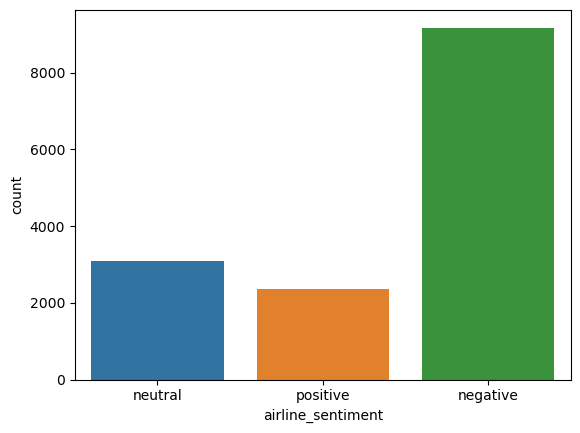

In [60]:
sns.countplot(data=df,x='airline_sentiment')

In [61]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

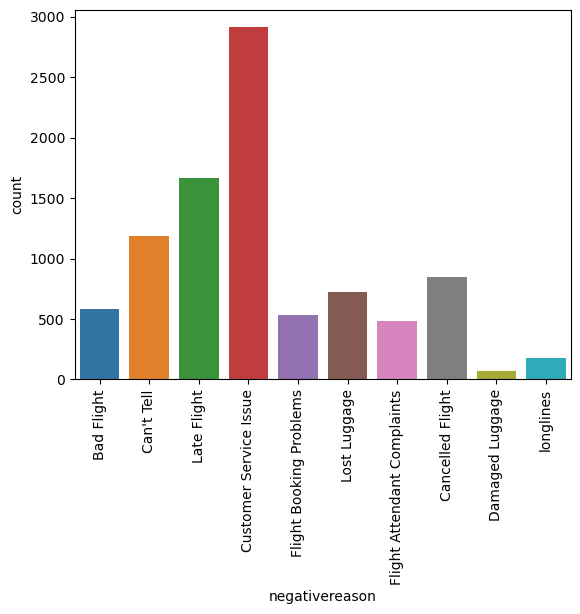

In [62]:
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90)
plt.show()

In [63]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

## Features

In [64]:
data = df[['airline_sentiment','text']]


In [65]:
y = df['airline_sentiment']
X = df['text']

### Train Test Split

In [66]:
df.shape

(14640, 15)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

## Vectorization?

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [70]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [71]:
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

In [73]:
# DO NOT RUN THIS FOR BIGGER SPARSE MATRIX

#X_train_tfidf.todense()

## Model Comparison

In [74]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [77]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=5000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=5000)

In [78]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_tfidf,y_train)

SVC()

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

### Performance Evaluation

In [82]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

def report_model(mod1):
    pred = mod1.predict(X_test_tfidf)
    print(classification_report(y_test,pred))
    cm = confusion_matrix(pred, y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



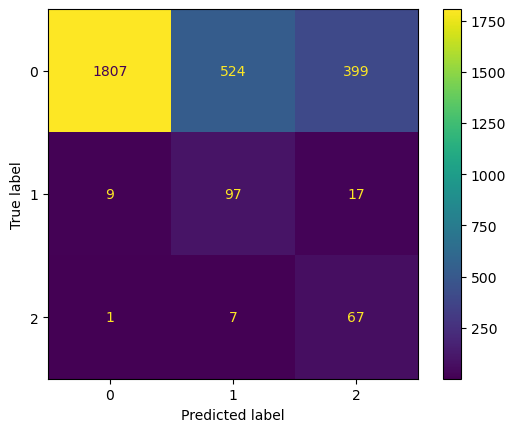

In [83]:
report_model(nb)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



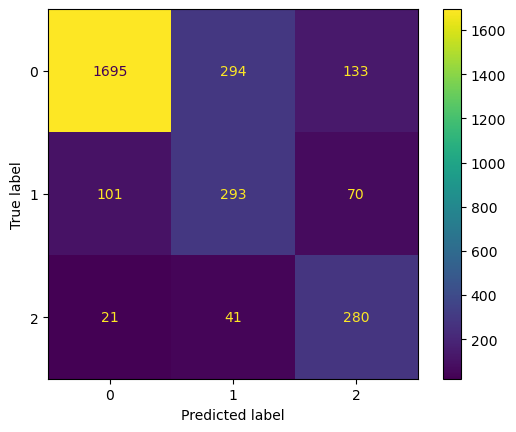

In [84]:
report_model(log)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



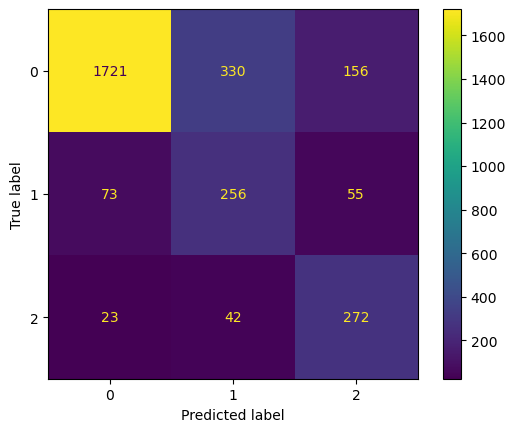

In [85]:
report_model(svc)

              precision    recall  f1-score   support

    negative       0.79      0.83      0.81      1817
     neutral       0.47      0.47      0.47       628
    positive       0.63      0.50      0.56       483

    accuracy                           0.70      2928
   macro avg       0.63      0.60      0.61      2928
weighted avg       0.69      0.70      0.70      2928



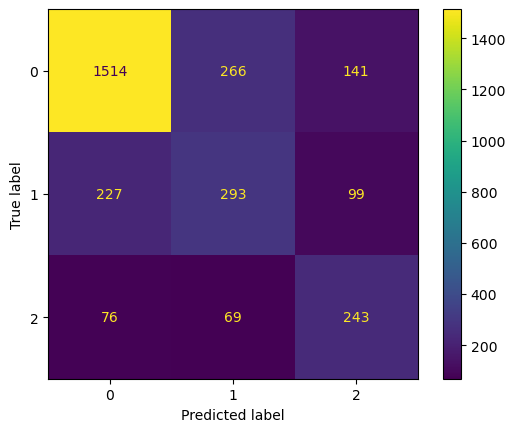

In [86]:
report_model(knn)

              precision    recall  f1-score   support

    negative       0.76      0.93      0.84      1817
     neutral       0.58      0.34      0.43       628
    positive       0.74      0.50      0.60       483

    accuracy                           0.73      2928
   macro avg       0.69      0.59      0.62      2928
weighted avg       0.72      0.73      0.71      2928



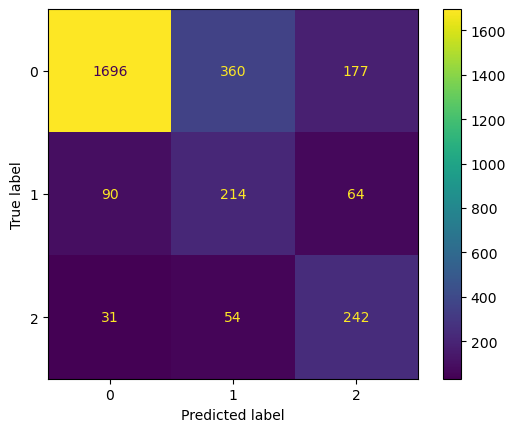

In [87]:
report_model(rf)

### Finalize a Pipeline for New Tweets

In [88]:
from sklearn.pipeline import Pipeline

In [91]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('log',LogisticRegression(max_iter=5000))])
pipe.fit(df['text'],df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('log', LogisticRegression(max_iter=5000))])

In [95]:
new_tweet = ['Good Flight but seats were horrible']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [97]:
new_tweet1 = ["I would travel again with you"]
pipe.predict(new_tweet1)

array(['negative'], dtype=object)